**TIME SERIES ANALYSIS FOR STOCK MARKET DATA SPECIFICALLY AMAZON. DATA SOURCE IS YAHOO.API AND ALPHADVANTAGE.API**

**This notebook is Part 1 of Time series modelling for Amazon Stock Prediction
It deals with:**

**1.   Data Exploration**

**2.   Making a time series window**

**3.   Feature engineering from the data**

**4. Make an ARIMA model**

**5. Make a Fourier series mode**l

**6. Make a LSTM model with one feature**

**7.Make a LSTM model with multiple features**

**8.Conclusion**





**Level 0: INSTALLATION**

**1.   Set up modules on google colab**

**2.  Take in data from yahoo.api**

**3. For privacy of my own account I have blocked these links and API keys off**

**Hint: Google colab Python 3 version comes with all Python packages and modules. It's easier to use than Anaconda or Ubuntu and has a great GPU drive.** 





In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

This code installs the PyDrive library, which allows for connecting to and manipulating Google Drive files. It then imports the necessary modules from PyDrive and google.colab to use for authentication. The code then proceeds to authenticate and create a PyDrive client, which will be used to access files on Google Drive. This is done by calling authenticate_user(), which requires the user to provide permissions to access their Drive account. Then, an instance of GoogleAuth is created and assigned to the variable gauth, which is used to set the credentials to the application default using GoogleCredentials. Finally, a drive object is created using the GoogleAuth instance gauth to access Google Drive. Overall, this code sets up the necessary components and authenticates the user access to Google Drive using the PyDrive library.

**Use the code above to set up Drive which will have csv file.**

Credit: https://medium.com/paper-club/how-to-set-up-google-colab-colaboratory-for-building-pyro-models-8e51129e772a

In [0]:
link = 'https://drive.google.com/open?id=1y394o-wiPqYPaWzVYTPRr8xpE_aM9621'

This code is in charge of assigning a value to the variable `link`, which is a URL to a file in Google Drive. The URL is stored as a string data type. This code doesn't perform any other action, it solely stores the URL in the `link` variable. The URL is for a file located in Google Drive that can be opened or accessed by anyone with the link. Overall, this code is used to store a URL in a variable, possibly for later use.

**Link to your google drive. This will make your drive public to all so be careful who you give it to.**

In [12]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1y394o-wiPqYPaWzVYTPRr8xpE_aM9621


This code first assigns "fluff" as a placeholder variable. The `.split()` method is then used to split the string into two parts, with the delimiter being set as the "=" symbol. This means that the string will be divided into two parts at the "=" symbol, creating a list with two elements. The first element will be assigned to the "fluff" variable, and the second element will be assigned to the "id" variable. This is known as unpacking or destructuring. The second part of the code then prints out the value of the "id" variable, which will be everything after the "=" symbol. This is a way to verify that the string was correctly split and the desired value was assigned to the "id" variable. Overall, this code is used to extract specific information from a string that is separated by a "=" symbol.

**To check I got data in my file and it's been read**

In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AMZN.csv')
# Dataset is now stored in a Pandas Dataframe

This code uses the library pandas, which is commonly used for data manipulation and analysis. The first line simply imports the pandas library and gives it a shorter name of "pd" for easier use in the code. Next, it creates a variable called "downloaded" and assigns it the value of a file created using the "drive" library. This file has a specific ID that is passed in the code. The third line uses the "GetContentFile" function to retrieve the content of the file with the given ID and name it "AMZN.csv". This is then saved as a Pandas Dataframe, which is a data structure used in the pandas library for storing and manipulating data. Essentially, this code downloads a file with a specific ID and stores its data in a pandas dataframe, making it ready for data analysis and manipulation.

In [14]:
pip install mxnet

This line of code performs a command that lets users download and install MXNet -- "pip" is a package management system used to install and manage software packages written in the Python programming language, and "install" is a pip command used to install packages. MXNet is a popular open-source deep learning framework used for developing machine learning models. By executing this command, the user will be able to access and use the MXNet library in their Python environment for machine learning tasks. This package installation process is important as it allows users to add extra functionality to their existing code or build new applications using MXNet.

**install mxnet a python package for time series data great for visualization**

In [0]:
import time
import numpy as np

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

First, we import necessary libraries and modules like time, numpy, mxnet, datetime, seaborn, matplotlib, sklearn, and xgboost. These libraries will be used to perform various mathematical operations, manipulate data, and visualize data.   Next, we specify the time period for which we want to analyze our data by defining a start and end date using the datetime library.   Then, we create a function to download data from a given link using the mxnet library and convert it into a pandas dataframe.   Next, we download the data using our function and preprocess it by filling in any missing values and converting the date column into a datetime data type.   Then, we perform some exploratory data analysis using seaborn and matplotlib to visualize the trends and patterns in our data.   Next, we use PCA to reduce the dimensionality of our data and standardize our data using the MinMaxScaler and StandardScaler from the sklearn library.   After that, we define a function to split our data into training and testing sets.   Next, we use the xgboost library to create a boosted tree model and use the training and testing data to train and evaluate the model.   Finally, we use the accuracy_score from sklearn to calculate the accuracy of our model and use the mean_squared_error function to calculate the error between the predicted and actual values.   In summary, this code performs various operations to download, preprocess, explore, and analyze data from a given source. It also uses machine learning algorithms to create a model and evaluate its performance. These steps are important for gaining insights, making predictions, and improving decision making.

In [0]:
import warnings
warnings.filterwarnings("ignore")

This code is importing a set of warnings and then filtering them to be ignored. This means that any warnings that may occur during runtime of the code will not be displayed to the user. Warnings are typically used to notify the user of potential issues or problems that may arise during the execution of the code, however, in this case, the developer does not want these warnings to be displayed. This can be useful if the warnings are not critical to the functionality of the code or if the developer is already aware of them and does not need to see them again.

In [0]:
context = mx.cpu(); model_ctx=mx.cpu()
mx.random.seed(1719)

This code first assigns a variable "context" to the mx.cpu() function, which sets the context for computational operations to be on the CPU. Then, the variable "model_ctx" is assigned to the same mx.cpu() function, indicating that the defined model will also be run on the CPU. This ensures that the model and any associated operations are run on the same device. Finally, the mx.random.seed(1719) function is called to set the seed for generating random numbers, providing reproducibility for the results of the model. Overall, this code sets the computational context and ensures consistency for training and running the defined model.

Setting up mxnet model 
Need this to create an ARIMA model and Fourier series model easily 

In [0]:
def parser(x):
    return datetime.datetime.strptime(x,'%m/%d/%Y')

This code defines a function called "parser" that takes in a variable "x" as an input. The purpose of this function is to convert the date format from month/day/year to a datetime object using the "strptime" method from the "datetime" library. Inside the function, the "strptime" method is called and takes in two arguments - "x" which is the original date string, and "%m/%d/%Y" which is the format that the date string needs to be converted to. This format specifies that the date string contains the month, day, and year in that specific order, separated by a forward slash. The converted datetime object is then returned as the output of the function. This code can be used to convert a date string into a datetime object, which can then be used for various operations and calculations.

**Always sort time and format it properily for time series data. Here sorted out it month-date-year format.** 

In [0]:
import pandas as pd

This code imports a Python library called "pandas", which is commonly used for data analysis and manipulation. This library provides tools and data structures to help work with tabular data, making it easier to analyze and process large datasets.   In order to use the pandas library, it first needs to be imported into the current Python session. The "import" statement allows us to bring in external libraries and access their functionalities within our code. Here, we are importing the pandas library under the alias "pd". This alias allows us to use shorthand notation when calling any of the pandas functions, for example "pd.DataFrame()" instead of "pandas.DataFrame()".   Once the library is imported, it can be used to perform various data operations such as cleaning, filtering, merging, and analyzing datasets. Overall, this line of code is necessary in order to use the pandas library and its capabilities in our code.

In [0]:
dataset_ex_df = pd.read_csv("AMZN.csv", header=0, parse_dates=[0], date_parser=parser)

This code imports the pandas library and then uses it to read in a csv file called "AMZN.csv". The "header=0" argument specifies that the first row of the csv file contains the column names. The "parse_dates=[0]" argument indicates that the first column of the csv file contains dates, and the "date_parser=parser" argument specifies that the dates should be in a particular format. The data is then saved as a dataframe variable called "dataset_ex_df". Essentially, this code is loading a csv file into a dataframe for further analysis.

In [21]:
dataset_ex_df[['Date', 'Close']].head(3)

Date       Close
0 2010-01-04  133.899994
1 2010-01-05  134.690002
2 2010-01-06  132.250000

This code uses single bracket notation to access the 'Date' and 'Close' columns of the dataset_ex_df data frame. It then uses the head() method to return the first three rows of the data frame. The head() method is useful for quickly previewing the contents of a data frame. In this case, the code simply returns the first three rows of the 'Date' and 'Close' columns, which may contain values or data for different dates and closing prices.

**Have a good look at closing prices and date. Most time series analysis go with trying to fo find closing prices.** 
**The reason is because closing prices generally summarize the way business was going better than opening prices or average prices.**
**Below is a great article to understand stock markets better**
https://medium.com/s/story/predicting-the-stock-market-is-easier-than-you-might-think-4f1e0bc05cfe

In [22]:
print('There are {} number of days in the dataset.'.format(dataset_ex_df.shape[0]))

There are 2265 number of days in the dataset.


The code prints a statement that includes the number of days in the dataset. It does this by using the .format() function to insert the number of rows in the dataset into the curly braces in the statement. The .shape[0] notation is used to specify that only the number of rows (not columns) should be counted.

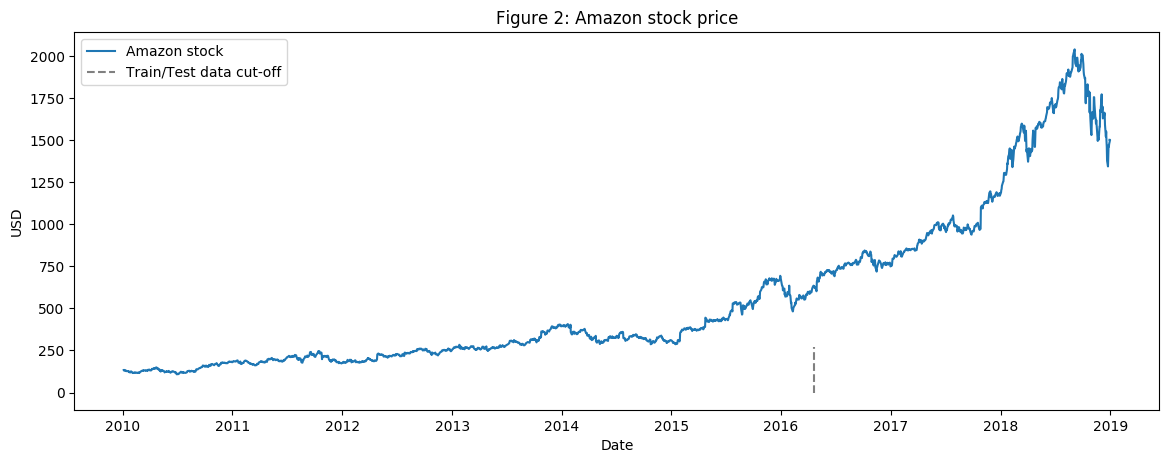

In [23]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Date'], dataset_ex_df['Close'], label='Amazon stock')
plt.vlines(datetime.date(2016,4,20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Amazon stock price')
plt.legend()
plt.show()


This code is used to create a figure that displays the stock price of Amazon over time. The first line sets the size of the figure and its dpi. The second line plots the 'Close' values against the 'Date' values, using the dataset_ex_df data frame. A label is added to this line to indicate that the plot represents Amazon stock. The third line adds a vertical line to the plot using the vlines function. This line is drawn at the date '2016/4/20' and is used to separate the train and test data. The line is drawn from 0 to 270 on the USD scale and is styled using dashed lines and gray color. The following two lines add labels to the x and y axes respectively, and a title is added to the figure. Finally, a legend is added to indicate which line represents the Amazon stock data. Finally, the figure is displayed.

**I have divided the stock data after 2010 upto 2019 for Amazon. 
Amazon business really boomed after 2010 and then peaked after 2015 so the testing will be very interesting since most of the data is in the exponential growth period. What I am going to do it normalize the training data such that similar data points over time are reduced to one single data point so that the model can train in such a way it can expect the exponential growth after 2015.**

**Inorder to predict better i NEED TO GENERATOR FEATURES SO I HAVE MORE INDICATORS TO PREDICT THE DATA**

# **FEATURE GENERATION**

In [0]:
def get_technical_indicators(dataset): #function to generate feature technical indicators
    
    
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window = 21).mean()
    
    #Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    #Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['Close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['Close'].rolling(window = 20).mean()) - (dataset['20sd']*2)
    
    
    #Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    #Create Momentum
    dataset['momentum'] = (dataset['Close']/100)-1
    
    
    
    return dataset

This code starts off by defining a function called "get_technical_indicators", which takes in a dataset as a parameter. This function is meant to generate technical indicators for the dataset.   Next, the code creates two new columns in the dataset called "ma7" and "ma21" which represent the 7 and 21-day moving averages of the "Close" column in the dataset.   Then, the code creates three new columns for MACD (Moving Average Convergence Divergence) called "26ema", "12ema", and "MACD". This is done by taking the exponential moving average of the "Close" column with a span of 26 and 12 for the "26ema" and "12ema" columns, respectively. The "MACD" column is then calculated by subtracting the "26ema" from the "12ema".   Afterwards, the code creates three new columns for Bollinger Bands called "20sd", "upper_band", and "lower_band". These are calculated by taking the standard deviation of the "Close" column over a period of 20 days and then adding or subtracting twice that value from the 20-day moving average of the "Close" column for the "upper_band" and "lower_band" columns, respectively.   Next, the code creates a new column for Exponential Moving Average (EMA) called "ema". This is done by taking the exponential moving average of the "Close" column with a smoothing factor of 0.5.   Finally, the code creates a new column for Momentum called "momentum". This is calculated by taking the "Close" column, dividing it by 100, and then subtracting 1. This is a common formula used to calculate momentum in technical analysis.   Lastly, the function returns the updated dataset with all the new technical indicators as its output.

**List of technical indicators and explanation:**


**1.   Bollinger bands: Bollinger Bands is used to define the prevailing high and low prices in a market to characterize the trading band of a financial instrument or commodity. Bollinger Bands are a volatility indicator. Bands are consists of Moving Average (MA) line, a upper band and lower band. The upper and lower bands are simply MA adding and subtracting standard deviation.** 

**2.   EMA: Exponential moving average is a better version of a simple moving average that doesnt have SMAs lag. Moving averages just average out the data for a given time so we know how the company's closing price are trending for a given amount of days. example for 4 days is price was 22,23 ,45,1**
**(the company crashed on 4th day) the average would be 23. Now 23 is a below average value so it gives us an idea that 45 was indeed just a fluke and that infact the company was always making losses**
**EMA is calculated as:**
**EMA(t)EMA(t0)=(1−α)EMA(t−1)+α p(t)=p(t0)**
**where** 
**α=1L+1 and length of window is α=2M+1**
**I used the ewm(exponential weighted mean ) function to calculate ema.**



**3. Momentum: Momentum is perhaps the simplest and easiest oscillator (financial analysis tool) to understand and use. It is the measurement of the speed or velocity of price changes, or the rate of change in price movement for a particular asset.**

**The formula for momentum is:**

**Momentum=V−Vx**
**where:**

**V=Latest price**

**Vx=Closing price**

**x=Number of days ago**


**Other features calculated are**
**moving averages of 7 and 21 days and standard deviation.**


**Great Links are:**
1. https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
2. https://towardsdatascience.com/trading-technical-analysis-with-pandas-43e737a17861

In [0]:
dataset_TI_df = get_technical_indicators(dataset_ex_df)

This code calls the "get_technical_indicators" function on the dataset_ex_df dataset and saves the result in a new dataset called dataset_TI_df. The "get_technical_indicators" function likely calculates various technical indicators for the financial data in dataset_ex_df, such as moving averages, volatility, and trading signals. This allows for a more thorough analysis and understanding of the data, which may assist in making investment decisions. The new dataset, dataset_TI_df, will now contain both the original financial data and the technical indicators, providing a more comprehensive representation of the data.

In [26]:
dataset_TI_df.head()

Date        Open        High  ...  ARIMA       Close  labels
0 2010-01-04  136.250000  136.610001  ...    NaN  133.899994     NaN
1 2010-01-05  133.429993  135.479996  ...    NaN  134.690002     NaN
2 2010-01-06  134.600006  134.729996  ...    NaN  132.250000     NaN
3 2010-01-07  132.009995  132.320007  ...    NaN  130.000000     NaN
4 2010-01-08  130.559998  133.679993  ...    NaN  133.520004     NaN

[5 rows x 20 columns]

The first step is to call the head() function on the dataset_TI_df object. This function will only return the first few rows of the dataset, typically 5 rows unless specified otherwise. This allows us to quickly preview the dataset and get a general idea of the data without having to display the entire set. Calling head() is a common practice when working with datasets as it provides a basic understanding of the data and its format.

In [0]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Amazon - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

This code is used for plotting technical indicators of a given dataset, specifically for the stock of Amazon. The first line defines a function called "plot_technical_indicators" which takes in two parameters, "dataset" and "last_days".   Next, the function creates a figure with a specific size and resolution using the plt.figure() function. This figure will contain all the plots of various technical indicators.   Then, a variable "shape_0" is created by getting the number of rows in the dataset using the "shape" attribute and "dataset" variable.   Next, a new variable "xmacd_" is defined by subtracting "last_days" from "shape_0". This will be used to set the x-axis limit for the MACD plot.   A new "dataset" is then created by taking in the last "last_days" rows of the original "dataset". This will be used to plot the technical indicators for only the last days.   Next, a variable "x_" is created and set equal to a range starting from 3 to the number of rows in the dataset. Then, using the "list" function, the index of "dataset" is converted to a list and assigned to "x_". This will be used later to plot the MACD subplot.   The first subplot is then created using the plt.subplot() function with 2 rows and 1 column. This means two plots will be displayed, one on top of the other.   In this first subplot, various technical indicators such as Moving Averages (ma7 and ma21), Closing Price, and Bollinger Bands (upper_band and lower_band) are plotted using the plt.plot() function. The color and line style of each plot are also specified.   The "fill_between" function is then used to fill the area between the upper and lower Bollinger Bands with a specific alpha value. This will give a visual representation of the band's range.   Other attributes such as the title, y-axis label, and legend are also defined for this subplot.   The second subplot is then created using the plt.subplot() function with the same layout as the first subplot. In this subplot, the MACD indicator is plotted using the plt.plot() function. Two horizontal lines are also plotted using the plt.hlines() function, indicating the overbought and oversold levels for the MACD.   Lastly, the plt.show() function is used to display the figure with all the plotted technical indicators.   In summary, this code takes in a dataset and plots various technical indicators such as Moving Averages, Closing Price, Bollinger Bands, and MACD, providing a visual representation of the stock behavior for the last given number of days.

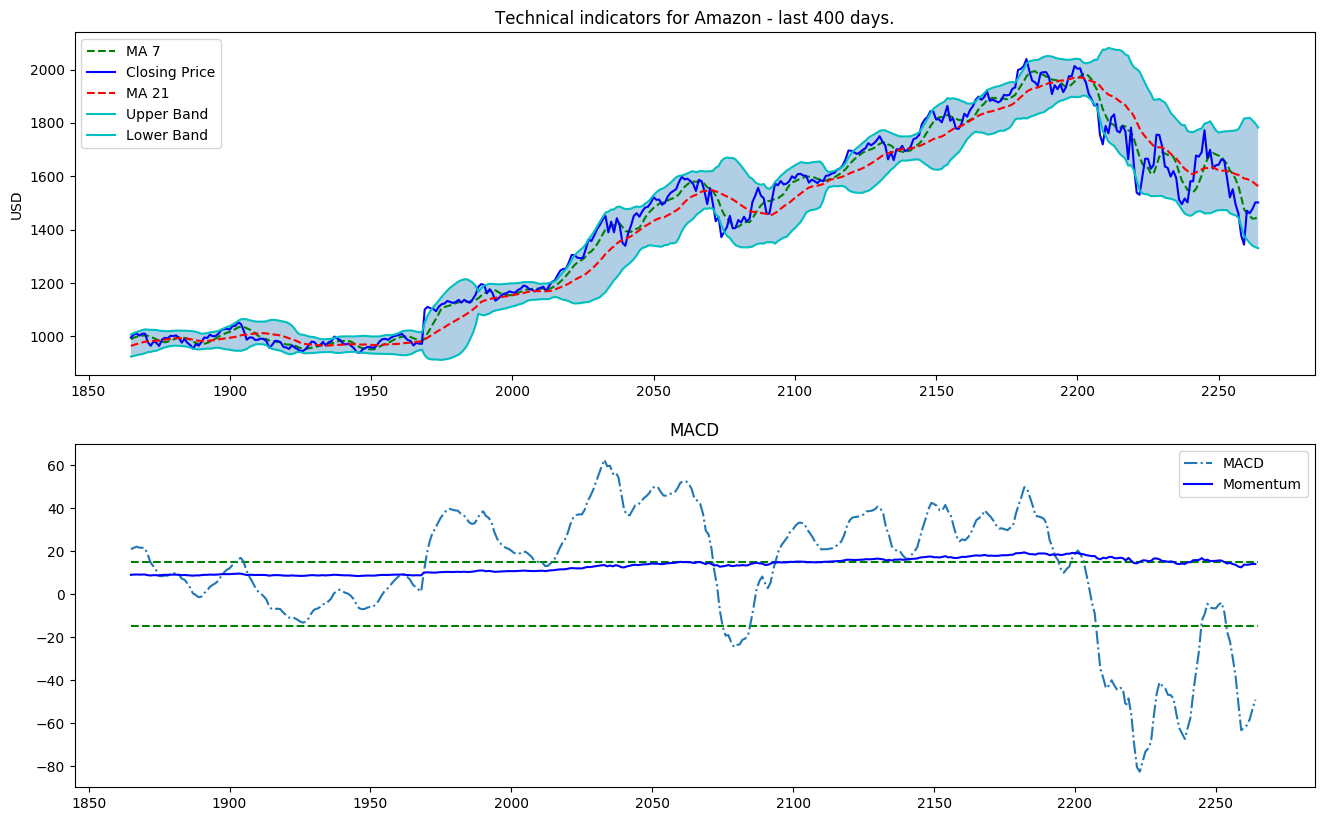

In [28]:
plot_technical_indicators(dataset_TI_df, 400)

This code takes in two arguments, dataset_TI_df and 400. The first argument is a dataset containing technical indicators, while the second argument is the number of previous time steps to be plotted. The function then proceeds to plot the technical indicators using the dataset and the specified number of time steps. The resulting plot shows how the technical indicators have changed over time, allowing for visual analysis of potential patterns and trends.

**PLOT UNDERSTANDING:** 

**THE FIRST PLOT IS SELF EXPLANATORY**

**THE SECOND PLOT IS SHOWING THE THRESHOLD BETWEEN MACD AND MOMENTUM. AS YOU CAN SEE MOMENTUM IS GIVING AN AVERAGE VALUE OF THE MACD IN BETEEEN THE PEAK VALUES AND THE HIGHEST OR LOWEST VALUES. MACD DEPENDS ON THE MOVING AVERAGE FEATURES AS CALCULATED ABOVE**



>  
# **ANALYSIS OF TIME SERIES USING FOURIER TRANSFORM**




In [0]:
data_FT = dataset_ex_df[['Date', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

This code starts by creating a new variable called 'data_FT' which takes a subset of the data from the dataset_ex_df and includes only the 'Date' and 'Close' columns. The next line of code uses the np.fft.fft function to compute the fast Fourier transform of the 'Close' column in the 'data_FT' variable. This transforms the data from the time domain to the frequency domain, allowing us to see patterns and trends that may not be apparent in the original data. The result is then stored in a new variable called 'close_fft'.   The next line of code uses the pd.DataFrame function to create a new dataframe called 'fft_df' which includes the 'fft' column from the 'close_fft' variable. This column contains the Fourier coefficients computed in the previous step. Then, two new columns are added to this dataframe using the 'apply' function. The first column, 'absolute', computes the absolute value of each entry in the 'fft' column, while the second column, 'angle', computes the angle of each entry in the 'fft' column. This allows us to see the magnitude and phase of each Fourier coefficient.   In summary, this code uses the fast Fourier transform to convert the time-domain data into the frequency domain, and then creates a new dataframe to store the resulting Fourier coefficients, along with their magnitudes and phases. This can be useful for analyzing patterns and trends in the data.

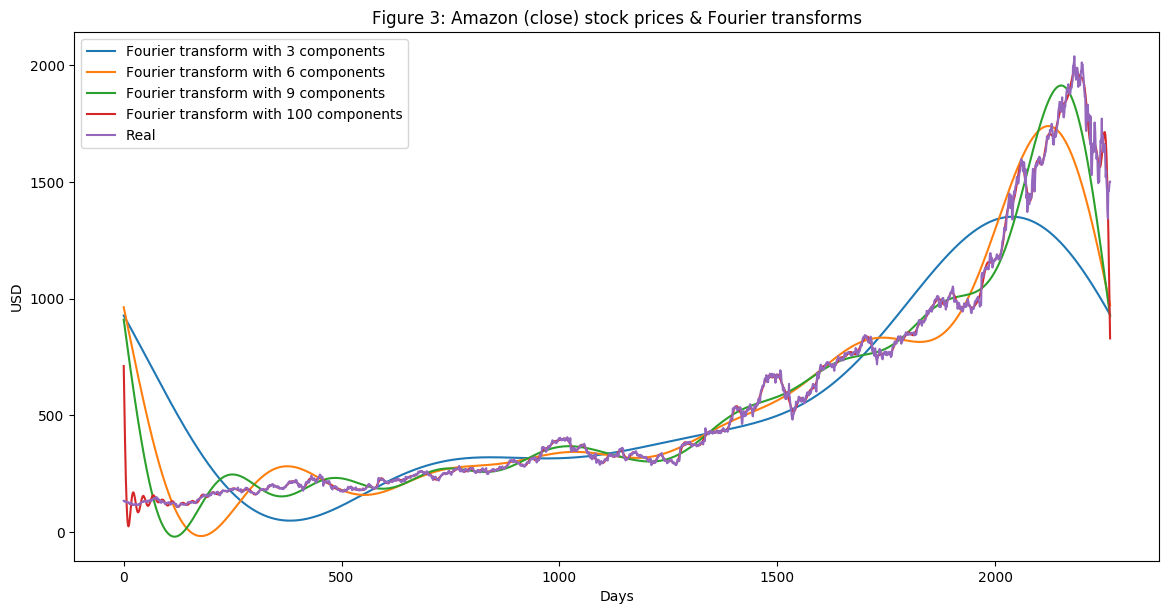

In [30]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Amazon (close) stock prices & Fourier transforms')
plt.legend()
plt.show()


The code above creates a figure with a chosen size and resolution using the plt.figure() function. Then, it converts a column from a dataframe into a numpy array and saves it as fft_list. The code then runs a for loop for each number in the list [3, 6, 9, 100]. This loop creates a copy of fft_list, sets a range to 10 elements below and above the current number in the list, and sets the values within that range to 0. This effectively removes some components from the fft_list. After that, the code plots the inverse discrete Fourier transform of the modified array against the original data, along with labels for the legend, axes, and title using the plt.plot() and plt.xlabel(), plt.ylabel(), and plt.title() functions. Finally, it displays the figure using the plt.show() function. Essentially, the code is showing the effect of removing various components from the Fourier transform of the stock price data, giving insight into the overall trends and patterns.

**Fourier Transform uses many spectral components to try and train data. From time domain its converted to frequency domain and then calculated. After that it's reconverted into time domain where it's plotted.**
**Fourier Transform as indicator helps to extract predominate cycle from a series of data**

**Reference: https://www.metastock.com/customer/resources/taaz/?p=58**

**In the above example we can see the spectral component of 100 is closest to the real price so we will move ahead ith 100**




In [0]:

def get_fourier(dataset):
    data_FT = dataset[['Date', 'Close']]
    close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
    close_fft = np.fft.ifft(close_fft)
    close_fft
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[100:-100]=0
    dataset['Fourier'] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

This function takes in a dataset as an input, and creates a new data frame called "data_FT" that contains only the "Date" and "Close" columns from the original dataset. Then, it uses NumPy's Fourier transform function to convert the "Close" column into a frequency domain representation, called "close_fft". Next, it applies NumPy's inverse Fourier transform function to "close_fft" to convert it back to the time domain. The resulting values are then added as a new "fft" column to a new data frame called "fft_df".   The function then adds two more columns to the "fft_df" data frame: "absolute" and "angle". The "absolute" column calculates the absolute value of each value in the "fft" column, while the "angle" column calculates the angle of each value in the "fft" column.   Next, the values in the "fft" column are converted into an array and assigned to a new variable called "fft_list". Then, a copy of "fft_list" is created and assigned to a new variable called "fft_list_m10". The values in "fft_list_m10" are set to 0 for all values except for the first 100 and last 100 values, which are left unchanged.   Finally, the function creates a new column in the original dataset called "Fourier" and assigns the absolute values calculated from the "fft_list_m10" array. This column essentially represents the Fourier transform of the original "Close" column, but with all values below a certain threshold (100 and -100) set to 0. Finally, the function returns the updated dataset.

In [0]:
dataset_TI_df = get_fourier(dataset_ex_df)

This line of code will take a dataset called dataset_ex_df and pass it through the function get_fourier. The function get_fourier will perform Fourier Transform on the dataset and return a new dataset with the Fourier transformed data. The new dataset is then assigned to the variable dataset_TI_df. This means that the step by step explanation is that the code reads the dataset_ex_df, performs Fourier Transform on it, and then assigns the result to dataset_TI_df variable. This ultimately allows the user to work with the Fourier transformed data in the dataset_TI_df variable, without altering the original dataset_ex_df.

In [33]:
dataset_TI_df.head(30)

Date        Open        High  ...  ARIMA       Close  labels
0  2010-01-04  136.250000  136.610001  ...    NaN  133.899994     NaN
1  2010-01-05  133.429993  135.479996  ...    NaN  134.690002     NaN
2  2010-01-06  134.600006  134.729996  ...    NaN  132.250000     NaN
3  2010-01-07  132.009995  132.320007  ...    NaN  130.000000     NaN
4  2010-01-08  130.559998  133.679993  ...    NaN  133.520004     NaN
5  2010-01-11  132.619995  132.800003  ...    NaN  130.309998     NaN
6  2010-01-12  128.990005  129.820007  ...    NaN  127.349998     NaN
7  2010-01-13  127.900002  129.710007  ...    NaN  129.110001     NaN
8  2010-01-14  129.139999  130.380005  ...    NaN  127.349998     NaN
9  2010-01-15  129.179993  129.649994  ...    NaN  127.139999     NaN
10 2010-01-19  126.309998  128.000000  ...    NaN  127.610001     NaN
11 2010-01-20  127.129997  129.199997  ...    NaN  125.779999     NaN
12 2010-01-21  127.260002  128.149994  ...    NaN  126.620003     NaN
13 2010-01-22  125.599998  127.669998  ...    NaN  121.430000     NaN
14 2010-01-25  122.099998  122.279999  ...    NaN  120.309998     NaN
15 2010-01-26  120.559998  122.980003  ...    NaN  119.480003     NaN
16 2010-01-27  121.029999  123.330002  ...    NaN  122.750000     NaN
17 2010-01-28  124.430000  127.199997  ...    NaN  126.029999     NaN
18 2010-01-29  129.770004  131.850006  ...    NaN  125.410004     NaN
19 2010-02-01  123.180000  124.860001  ...    NaN  118.870003     NaN
20 2010-02-02  118.790001  118.980003  ...    NaN  118.120003     NaN
21 2010-02-03  117.120003  119.610001  ...    NaN  119.099998     NaN
22 2010-02-04  118.639999  120.330002  ...    NaN  115.940002     NaN
23 2010-02-05  115.879997  117.650002  ...    NaN  117.389999     NaN
24 2010-02-08  119.379997  121.000000  ...    NaN  116.830002     NaN
25 2010-02-09  118.199997  119.089996  ...    NaN  118.029999     NaN
26 2010-02-10  118.000000  118.610001  ...    NaN  117.360001     NaN
27 2010-02-11  117.209999  120.419998  ...    NaN  120.089996     NaN
28 2010-02-12  118.989998  119.940002  ...    NaN  119.660004     NaN
29 2010-02-16  120.059998  120.500000  ...    NaN  117.529999     NaN

[30 rows x 20 columns]

This code calls the head function on the dataset_TI_df DataFrame, which is a way to view the first few rows of the dataset. The number 30 indicates that it will show the first 30 rows of the DataFrame. This function is useful for getting an overview of the data and its structure.

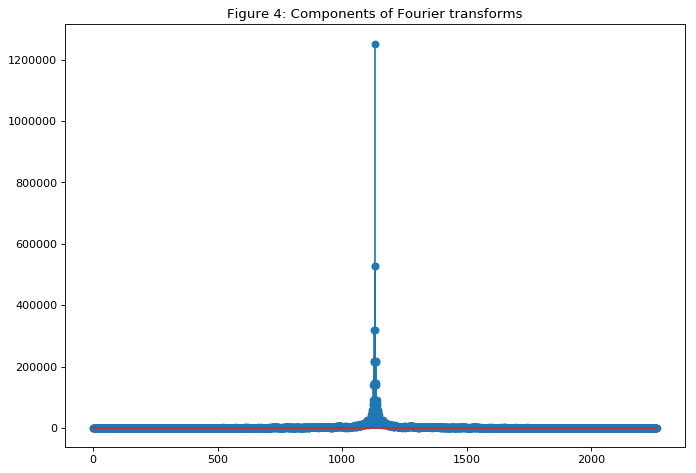

In [34]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure 4: Components of Fourier transforms')
plt.show()

- The first line is an import statement to import the deque data structure from the collections module. - The second line is creating a new deque named "items" and assigning it the values in the column "absolute" from the fft_df dataframe as a list. - The next line is using the rotate() function to shift the items in the deque "items" by the number of items divided by 2, rounded down. This effectively reorders the items in the deque. - The following line is setting up the plot with the desired size and resolution. - The plt.stem() function is creating a stem plot using the items in the deque as the data. - The plt.title() function is setting the title of the plot. - The final line is displaying the plot.

**Component analysis of Fourier Transform**
**Once the spectral part of Fourier transform is removed the magnitude part is quite close to the test series values!** 
**Fourier transform is working!**

# **ARIMA**

 **ARIMA as a feature:**
   
 **Autoregressive Integrated Moving Average (ARIMA) — This was one of the most popular techniques for predicting future values of time series data (in the pre-neural networks ages). Let’s add it and see if it comes off as an important predictive feature.**
   
  **ARIMA is a technique for predicting time series data. We will show how to use it, and all though ARIMA will not serve as our final prediction, we will use it as a technique to denoise the stock a little and to (possibly) extract some new patters or features.**
  
  **ARIMA is an acronym. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:**

**1. AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.**

**2. I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.**

**3. MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.**

**The parameters of the ARIMA model are defined as follows:**

**p: The number of lag observations included in the model, also called the lag order.**
**d: The number of times that the raw observations are differenced, also called the degree of differencing.**
**q: The size of the moving average window, also called the order of moving average.**

**STEPS FOR ARIMA**

**1.Define the model by calling ARIMA() and passing in the p, d, and q parameters.**

**2. The model is prepared on the training data by calling the fit() function.**

**3.Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.**
 
**First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.**

**When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.**

**Running the example prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.**





In [35]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = data_FT['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2264
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9244.973
Method:                       css-mle   S.D. of innovations             14.361
Date:                Fri, 16 Aug 2019   AIC                          18503.947
Time:                        17:13:56   BIC                          18544.021
Sample:                             1   HQIC                         18518.569
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6074      0.291      2.086      0.037       0.037       1.178
ar.L1.D.Close    -0.0270      0.021     -1.287      0.198      -0.068       0.014
ar.L2.D.Close    -0.0002      0.021     

This code imports the necessary libraries for performing time series analysis and creates a DataFrame object using the pandas library. It then selects the 'Close' column from the DataFrame and assigns it to the variable 'series'. Next, it uses the ARIMA model from the statsmodels library and specifies the order of the model as (5,1,0), indicating that it will use 5 previous observations and a lag of 1 for differencing. The model is then fit to the 'series' data and the results are stored in the variable 'model_fit'. Finally, the summary of the fitted model is printed, displaying the statistical information and diagnostics of the model.

 **SUMMARY OF THE ARIMA MODEL**
 
**A good starting point for the AR parameter of the model may be 5 which we did**

**From the summary of the ARIMA we can see that most P-values are greater than 0.05 other than the last two.The model should be great!**

**The difference between AIC and BIC is low so this indicates this is a good model**

**Running the example, we can see that there is a positive correlation with the first 0-to-500 lags that is perhaps significant for the first 250 lags in the autocorrelation below**



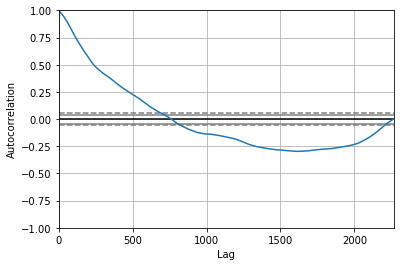

<Figure size 800x560 with 0 Axes>

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

This code imports the "autocorrelation_plot" function from the "pandas.plotting" library. This function is then used to create a plot by passing in a "series" as an input. The next two lines of code create a figure that is 10 inches by 7 inches with a resolution of 80 pixels per inch, and then displays the plot. This code is used to analyze and visualize the autocorrelation of a given series of data.

**Refernce to ARIMA code:**

https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56

https://github.com/gmonaci/ARIMA

**ARIMA Explantion :**

https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56




In [0]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

dataset_TI_df['ARIMA'] = pd.DataFrame(predictions)

The first line of code imports specific functions from the "pandas" library, which is commonly used for data analysis in Python. The functions being imported include "read_csv", which allows us to read data from CSV files, "datetime", which can be used for manipulating dates and times, "DataFrame", which creates a data structure for organizing data, and "ARIMA" from the "statsmodels.tsa" library, which is used for time series analysis.  The next line of code initializes a variable "X" which is assigned the values of a data series. This series could be any type of data, but based on the functions being imported, it is likely a time series. The following line of code calculates the length of the series, and multiplies it by 0.66 to get two-thirds of the data. This is then converted to an integer and assigned to the variable "size".  The next line of code splits the data into a training and testing set, with the first two-thirds being assigned to the training set, and the remaining one-third being assigned to the testing set. This is done using the indices of the original data series.  The following line initializes a list variable "history" with the values from the training set. This is done using a "list comprehension", which is a shorthand method for creating lists in Python. The "history" list will be used to fit the ARIMA model.  The next line of code creates an empty list variable "predictions" which will be used to store the predicted values from the ARIMA model.  The for loop that follows will iterate through the testing set. For each iteration, an ARIMA model is created using the "history" list as the training data, and the "order" of the model is set to (5,1,0). This order represents the number of autoregressive, differencing, and moving average terms in the model. This line also assigns the fit of the model to the variable "model_fit".  The next line uses the "forecast" function from the "model_fit" object to generate a prediction for the next value in the series. The predicted value is then assigned to the variable "yhat" as the first element of the "output" object.  Next, the predicted value is appended to the "predictions" list, and the test value at the current iteration is added to the "history" list. This allows the model to make a prediction based on the most recent training data at each iteration.  Finally, the "ARIMA" column of the original data set is created and assigned the values from the "predictions" list, using the "DataFrame" function from the "pandas" library.  In summary, this code splits a time series into training and testing sets, then uses the ARIMA model to predict the remaining one-third of the data. The predicted values are then stored in a new column of the original data set for further analysis. This process is repeated for each iteration of the testing set to generate multiple predictions. The accuracy of the predictions can then be evaluated using the "mean_squared_error" function from the "sklearn.metrics" library.

In [38]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 557.865


This code first calculates the mean squared error by taking two inputs, 'test' and 'predictions'. It then stores this value in the variable 'error'. The print statement then outputs the value of the mean squared error with a precision of three decimal places, followed by the text 'Test MSE:'. This code could be used to evaluate the accuracy of a machine learning model by calculating the mean squared error between the actual data (test) and the predicted data (predictions).

MSE issquare root of square of average of difference between actual and predicted prices. In this case they MSE is quite big.(MSE ideally for this data should be between 30 and 100). However I will plot the model and check

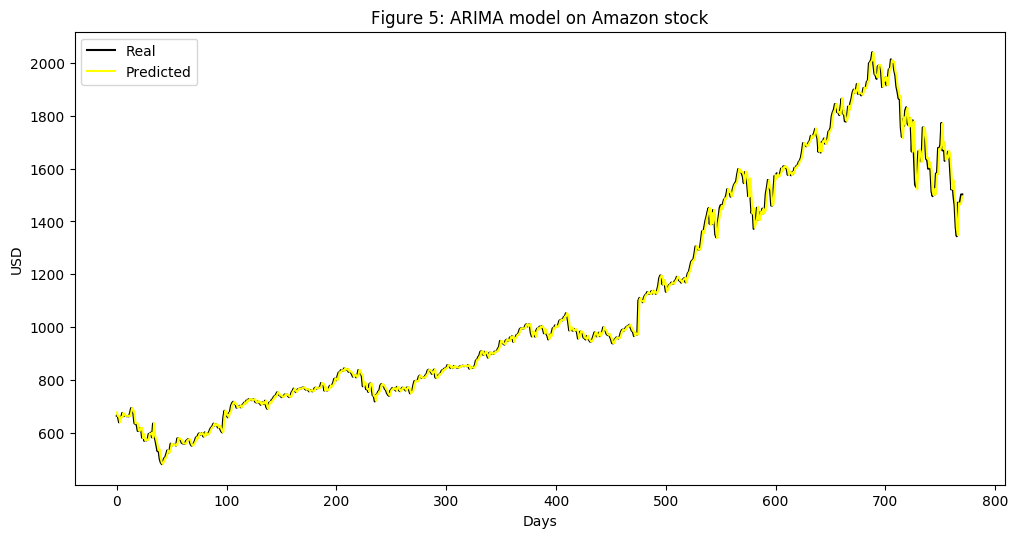

In [39]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on Amazon stock')
plt.legend()
plt.show()

This code is plotting a comparison between the predicted and actual prices of the Amazon stock using an ARIMA model. The first line sets the figure size to be displayed, followed by a plot of the actual prices in black and the predicted prices in yellow. The two lines that start with plt.xlabel and plt.ylabel set the labels for the x and y axes of the graph, and the title line sets the title of the graph. Lastly, the plt.legend function is used to create a legend showing which line represents which type of data. The final line calls the plt.show function to display the graph.

**As we can see from Figure 5 ARIMA gives a very good approximation of the real stock price. We will use the predicted price through ARIMA as an input feature into the LSTM because, as we mentioned before, we want to capture as many features and patterns about Amazon as possible.**

In [40]:
dataset_ex_df.head(8)

Date        Open        High  ...       ARIMA       Close  labels
0 2010-01-04  136.250000  136.610001  ...  678.303785  133.899994     NaN
1 2010-01-05  133.429993  135.479996  ...  664.043069  134.690002     NaN
2 2010-01-06  134.600006  134.729996  ...  663.388476  132.250000     NaN
3 2010-01-07  132.009995  132.320007  ...  640.204421  130.000000     NaN
4 2010-01-08  130.559998  133.679993  ...  660.576572  133.520004     NaN
5 2010-01-11  132.619995  132.800003  ...  658.990696  130.309998     NaN
6 2010-01-12  128.990005  129.820007  ...  676.445680  127.349998     NaN
7 2010-01-13  127.900002  129.710007  ...  669.110595  129.110001     NaN

[8 rows x 20 columns]

This code calls the head() function on the dataset_ex_df dataframe and specifies 8 as the number of rows to be displayed. This function returns the first 8 rows of the dataframe, allowing the user to get a quick look at the data and its structure. It is useful for understanding and exploring the dataset, as well as making initial observations about the data. It is also commonly used for debugging purposes. The resulting displayed data will be easier to read and analyze compared to viewing the entire dataset.

In [41]:
print('Total dataset has {} samples, and {} features.'.format(dataset_ex_df.shape[0], \
                                                              dataset_ex_df.shape[1]))

Total dataset has 2265 samples, and 20 features.


This code is printing out a statement with information about a dataset. The words inside the curly braces are placeholders for the actual values that will be inserted into the statement. In this case, the first placeholder will be replaced by the number of samples in the dataset (which is determined by the number of rows in the dataset_ex_df variable), and the second placeholder will be replaced by the number of features (which is determined by the number of columns in the dataset_ex_df variable). This statement is using the .format() method to insert these values into the string. The backslash (\) indicates that the statement continues on the next line, which is done for formatting purposes and doesn't affect the functionality of the code. Overall, this code is simply printing out a sentence with information about the dataset's size.

# **FINDING IMPORTANT FEATURES USING XGBOOST :**

**Having so many features we have to consider whether all of them are really indicative of the direction GS stock will take. For example, we included USD denominated LIBOR rates in the dataset because we think that changes in LIBOR might indicate changes in the economy, that, in turn, might indicate changes in the AMZN stock behavior. But we need to test. There are many ways to test feature importance, but the one we will apply uses XGBoost, because it gives one of the best results in both classification and regression problems.**


**Since the features dataset is quite large, for the purpose of the presentation here we’ll use only the technical indicators. During the real features importance testing all selected features proved somewhat important so we won’t exclude anything when training.**


**So, after adding all types of data (the correlated assets, technical indicators, fundamental analysis, Fourier, and Arima) we have a total of 20 features for the 2,265 days (as mentioned before, however, only 1,585 days are for training data).**

**What is XGBoost?**

**XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.**

![alt text](https://miro.medium.com/max/1094/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

**WHY DOES XGBOOST WORK SO WELL?
XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.**

![alt text](https://miro.medium.com/max/1094/1*FLshv-wVDfu-i54OqvZdHg.png)



In [0]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

This code defines a function called 'get_feature_importance_data' that takes in a dataframe called 'data_income' as input. The function begins by making a copy of the input dataframe and storing it in a new variable called 'data'. Then, it separates the 'Close' column from the rest of the columns in the dataframe and assigns it to a variable y. The next step is to select the columns from 1 to 19 in the dataframe and assign them to a new variable called X.  Next, the code calculates the number of samples in the dataset and stores it in a variable called 'train_samples'. This number is used to split the dataset into a training set and a testing set. The training set contains 65% of the total samples, while the remaining 35% are used for testing. The code then selects the first 'train_samples' rows from the dataset and assigns them to a new variable called 'X_train' and the remaining rows to a variable called 'X_test'. Finally, the code also splits the 'Close' column into training and testing sets using the same index values as the features, and stores them in variables called 'y_train' and 'y_test'. Lastly, the function returns all four variables as a tuple, which can be unpacked using multiple assignment. Essentially, this function creates a training set and testing set from the input dataframe, which can be used for feature importance analysis.

In [0]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_TI_df)


This code refers to a function called "get_feature_importance_data", which prepares the training and test data to be used in a machine learning model. The first line of code states that the function returns two sets of data, one for training (X_train_FI and y_train_FI) and one for testing (X_test_FI and y_test_FI). These data sets are extracted from a larger data set called "dataset_TI_df", which is likely a dataframe that contains the features and target variable for the machine learning model. The function likely performs various data pre-processing tasks, such as handling missing values and encoding categorical variables, before splitting the data into the training and testing sets. Once the training and testing data sets are prepared, the first line assigns them to their respective variables, ready to be used in the machine learning model. These steps are essential in building a successful machine learning model as it ensures that the data used for training the model is formatted correctly and that the model can accurately evaluate its performance using the testing data.

In [0]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

This code is used to create a XGBoost regression model. First, we import the XGBoost library and then create a XGBRegressor object. The parameters being passed into the object include a gamma value of 0.0, 200 decision trees (n_estimators), a base score of 0.7, and a column sampling rate of 1. The learning rate is set to 0.05, which controls the step size when updating boosting weights. Overall, the code is setting up the framework for a regression model using the XGBoost algorithm with specific parameters and values specified.

In [45]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

[17:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


This code first initializes an XGBoost model named "xgbModel". XGBoost, or eXtreme Gradient Boosting, is a popular machine learning algorithm used for regression and classification tasks. The "regressor" variable contains the necessary parameters and settings for the XGBoost model, and the ".fit()" function is used to train the model.   The data used to train the model is passed into the function as the "X_train_FI" and "y_train_FI" variables, which represent the features and target variables in the training dataset, respectively. The function also takes in the parameter "eval_set", which is used to specify the datasets used for evaluation during training. In this case, the evaluation set consists of the training data (X_train_FI,y_train_FI) and the testing data (X_test_FI, y_test_FI).   Lastly, the "verbose" parameter is set to "False", which means that the training process will not be displayed in the output. This is done to prevent cluttering the output with unnecessary information.

In [0]:
eval_result = regressor.evals_result()

The code is evaluating the results of a regressor using a function called eval_result(). When a regressor is used to make predictions, it compares the predicted values with the actual values and calculates an error for each prediction. These errors are then used to evaluate the overall performance of the regressor. The eval_result() function provides information about these evaluation results, such as the errors for each prediction, the average error, and other relevant metrics. By evaluating the results, we can determine how well the regressor is performing and make any necessary adjustments to improve its performance. This is an important step in building and refining machine learning models.

In [0]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

- Jones  This code stores the number of training rounds in a variable called "training_rounds". It does this by taking the length of the "rmse" values from the "validation_0" key in the "eval_result" dictionary, which represents the number of rounds that the model has been trained on. It then subtracts the value of "Jones", which is presumably the name or an identifier, from this length. Overall, this code allows for the tracking of the number of training rounds and can be used for various purposes in the code.

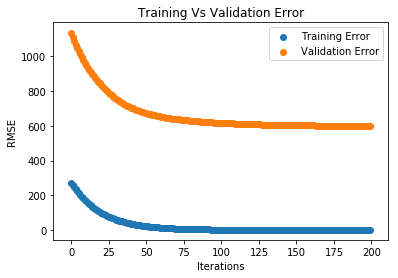

In [48]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

This code creates a scatter plot with the x-axis as the training rounds and the y-axis as the validation error. The "eval_result" variable is used to access the RMSE values for both the training and validation data sets, which are then plotted on the scatter plot. The x-axis is labeled as "Iterations" and the y-axis as "RMSE". The title of the plot is set as "Training Vs Validation Error" and a legend is added to show the labels for each scatter plot. Finally, the plot is displayed. This code allows for a visual comparison between the training error and validation error, which is useful for assessing the performance of a machine learning model.

**THE DIFFERENCE BETWEEN VALIDATION AND TRAINING ERROR SHOWS A UNDERFIT MODEL. EXPECTED AS SAID BEFORE BECAUSE OF THE WAY TRAINING AND TESTING DATA IS SPLIT JUST WHEN AMAZON BOOMS!**

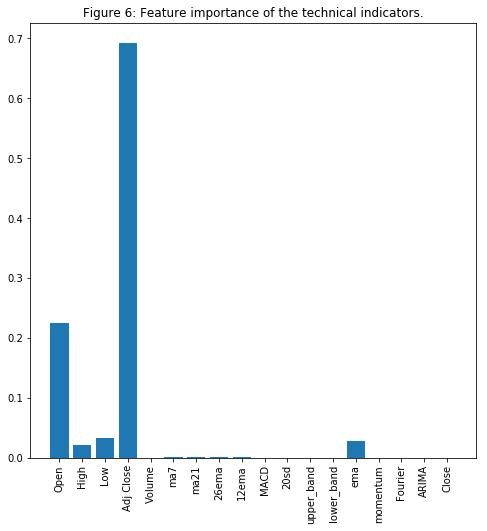

In [49]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

This code snippet creates a figure with specified dimensions and uses the PyPlot library to plot a bar graph. It takes the feature importance values from a specific model and uses them as the height of each bar in the graph. The tick labels on the x-axis are set to the columns of the input dataset used for training the model. Finally, a title is added to the graph and it is displayed. Overall, this code is used to visualize and analyze the importance of each feature in a given dataset.

**Not surprisingly (for those with experience in stock trading) that MA7, MA21, and EMA are among the important features.
I followed the same logic for performing feature importance over the whole dataset — just the training took longer and results were a little more difficult to read, as compared with just a handful of features.
Features like Open and Adj Close are bound to be close to Closing prices
So if EMA doesn't works out we will focus on Averaging prices from Open and Adj-CLose prices**


**Next steps:
We know which features are important. I suspect Fourier and ARIMA might be equally important but because of their
spectral component Fourier and because ARIMA doesn't produce any other features I won't be consideringthem.**

Code Ref for XGBoost:
1. https://xgboost.readthedocs.io/en/latest/get_started.html
2. https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

# **LSTM**

**LSTM is great at predicting stock market data. We are going to try to predict the closing prices using 1 feature Open(It has highest correlation to closing price) initially and then using multiple features(use some sort of one hot encoding) and then try to get a output.**

**An LSTM Network has its origin in a RNN. But it can solve the memory loss by changing the neuron architecture.**

![alt text](https://miro.medium.com/max/875/1*8nFrwolzTYtUWSaziiJGkg.png)

**The new neuron has 3 gates, each with a different goal. The gates are:**

**1.Input Gate**

**2.Output Gate**

**3.Forget Gate**

**An LSTM Neuron still receives as input its previous state:**

**LSTM Neuron passing as parameter its previous state.**

![alt text](https://miro.medium.com/max/875/1*J5W8FrASMi93Z81NlAui4w.png)


**Following steps are done:**

**1.  Clean up the data-Remove any NAs**

**2.   Create a test, train and validate set**

**3.   Create train for Open**

**4.   Normalize data** 

**5.Create feature and label set**

**6. Train, test data and  check with validation set**

**7. Make a prediction**

**8. Based on this prediction find if the feature extraction method of LSTM works**



In [50]:
#1. take dataframe and drop na
dataset_lstm_df = dataset_TI_df.drop(columns='Date')
dataset_lstm_df.head(7)

Open        High         Low  ...       ARIMA       Close  labels
0  136.250000  136.610001  133.139999  ...  678.303785  133.899994     NaN
1  133.429993  135.479996  131.809998  ...  664.043069  134.690002     NaN
2  134.600006  134.729996  131.649994  ...  663.388476  132.250000     NaN
3  132.009995  132.320007  128.800003  ...  640.204421  130.000000     NaN
4  130.559998  133.679993  129.029999  ...  660.576572  133.520004     NaN
5  132.619995  132.800003  129.210007  ...  658.990696  130.309998     NaN
6  128.990005  129.820007  126.550003  ...  676.445680  127.349998     NaN

[7 rows x 19 columns]

This code takes the specified dataframe, dataset_TI_df, and creates a new dataframe called dataset_lstm_df. This new dataframe is identical to the original one, except that the 'Date' column has been dropped. This means that the 'Date' column is no longer included in the new dataframe. The .head(7) function then displays the first 7 rows of the new dataframe, allowing the user to see the result of the dropped column.

In [51]:
print('Total dataset has {} samples, and {} features.'.format(dataset_lstm_df.shape[0], \
                                                              dataset_lstm_df.shape[1]))

Total dataset has 2265 samples, and 19 features.


This code prints a statement using the .format() method which replaces a set of curly braces with the values given in the parenthesis. It first accesses the dataset_lstm_df and uses the .shape method which returns a tuple of the number of rows and columns in the dataset. The first value of the tuple corresponds to the number of samples in the dataset and the second value corresponds to the number of features. These values are then passed into the .format() method to be used in the statement. Finally, the statement is printed to the console. This code is useful for quickly summarizing the size of a dataset in a human-readable format.

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

Using TensorFlow backend.


This code imports relevant modules and libraries from the keras library, which is used for building and training neural networks. The first line imports the "Sequential" class, which is a basic model type that allows for sequential layer building. The next three lines import specific layer types that are commonly used in neural network models. The "LSTM" layer type stands for Long Short-Term Memory and is used for processing sequential data, such as time series data. The "Dense" layer type represents a fully-connected layer, which is a basic type of neural network layer that connects every neuron in one layer to every neuron in the next layer. The "Dropout" layer type is used for preventing overfitting in neural networks by randomly dropping out neurons during training. The "Flatten" layer type is used for flattening input data that may have multiple dimensions into one-dimensional data in order to pass it into subsequent neural network layers.

In [0]:
#creating test, train and validate trains
train, validate, test = np.split(dataset_lstm_df.sample(frac=1), [int(.6*len(dataset_lstm_df)), int(.8*len(dataset_lstm_df))])

This code first imports the NumPy library and assigns it the name "np". Then, it creates three new data sets named "train", "validate", and "test". To assign values to these sets, it uses the NumPy function "split()". This function splits the data set "dataset_lstm_df" into three portions based on the given parameters: "frac", which determines the fraction of the data set to be used for each portion, and "len()", which calculates the length of the data set. The data set is randomized using the "sample()" function, and then the split is determined by the fraction defined in the "split" function. The first portion is given 60% of the data, the second portion is given 20%, and the third portion is given 20%. Finally, the new data sets are assigned to the previously defined sets "train", "validate", and "test". The code essentially splits a data set into three portions for training, validating, and testing a model.

**Split dataset into train,test and validate sets**

In [0]:
open_training = train.iloc[:, 1:2].values

(as) This code is assigning the values of a specific column from a data frame named "train" to a variable called "open_training". The column is identified by its position, which is the second column (index 1) in the data frame. The ".iloc" function is used to locate specific rows and columns in the data frame, and the values from this column are then extracted and assigned to the "open_training" variable. These values are now available to be used in further calculations or analysis.

**Normalize data:
The data is not normalized and the range for each column varies, especially Volume. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. I will use MinMaxScaler from Sci-kit Learn. Use a range to keep values similar for that much range**

**Keep a window for the length 2000 for your data between 50 and 500...since our length is slightly more than 2000 ill make it 60 to 450**

In [0]:
#normalise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
open_training = scaler.fit_transform(open_training)
#convert to right shape
features_set_1 = []
labels_1 = []
for i in range(60,450): 
    features_set_1.append(open_training[i-60:i, 0])
    labels_1.append(open_training[i, 0])
    
#Code ref: https://github.com/LiamConnell/deep-algotrading

This code imports the MinMaxScaler function from the sklearn.preprocessing library. This function is used to scale numerical data so that it falls between a specified range. In this case, the range is set to be between 0 and 1. The next line of code applies this scaler to the variable "open_training" which contains a dataset. This variable is overwritten with the scaled version of the data.   The next part of the code creates two empty lists: "features_set_1" and "labels_1". These lists will be used to store the features and labels for our model. The for loop iterates through the data, starting at index 60 and ending at index 450. This loop is used to create the features and labels for our model. Each iteration, the code appends the previous 60 data points to the "features_set_1" list. These 60 data points will be used as the features for our model. The code also appends the current data point to the "labels_1" list, which will be used as the label for our model.   This process is repeated until the end of the dataset is reached. The end result is that we have two lists: "features_set_1" which contains a list of lists (each containing 60 data points), and "labels_1" which contains a list of single data points. These lists can now be used to train a model using machine learning algorithms. This code is commonly used for time series data where the current data point depends on a certain number of previous data points. Overall, this code is an important step in preparing data for machine learning models.

**Convert feature set and label set into arrays and shape feature set into a 3D input that LSTM network demands**

In [0]:
features_set_1, labels_1 = np.array(features_set_1), np.array(labels_1)
features_set_1 = np.reshape(features_set_1, (features_set_1.shape[0], features_set_1.shape[1], 1))

First, the code creates two variables, "features_set_1" and "labels_1", and assigns them the values returned by the function np.array(). This converts the data into NumPy arrays, which are commonly used for scientific computing in Python.  Next, the code uses the np.reshape() function to change the shape of the "features_set_1" array. This is done by passing in the original shape value (features_set_1.shape[0]) and a new shape value (features_set_1.shape[1], 1). This essentially transforms the data into a new shape, which here is a 3-dimensional array.  The first parameter in the np.reshape() function is the input array, "features_set_1". The second parameter, (features_set_1.shape[0]), is the number of rows, while the third parameter, "features_set_1.shape[1], 1", specifies the new shape of the array. This effectively changes the array from a 2-dimensional to a 3-dimensional array, allowing for more complex data structures to be analyzed and processed.  Overall, this code converts the given data into a more suitable format, enabling it to be processed and analyzed more effectively. This is a common technique used in data science and machine learning, as it allows for easier manipulation and analysis of data sets.

In [57]:
#training it
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set_1.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.fit(features_set_1, labels_1, epochs = 100, batch_size = 32,validation_data = (features_set_1, labels_1))


W0816 17:26:38.344084 139733778487168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 17:26:38.400182 139733778487168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 17:26:38.408069 139733778487168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 17:26:38.632785 139733778487168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 17:26:38.642064 

Train on 390 samples, validate on 390 samples
Epoch 1/100
390/390 [==============================] - 9s 23ms/step - loss: 0.0847 - mean_absolute_error: 0.2147 - val_loss: 0.0723 - val_mean_absolute_error: 0.1844
Epoch 2/100
390/390 [==============================] - 4s 11ms/step - loss: 0.0664 - mean_absolute_error: 0.1909 - val_loss: 0.0704 - val_mean_absolute_error: 0.2252
Epoch 3/100
390/390 [==============================] - 4s 11ms/step - loss: 0.0680 - mean_absolute_error: 0.2016 - val_loss: 0.0652 - val_mean_absolute_error: 0.1994
Epoch 4/100
390/390 [==============================] - 4s 11ms/step - loss: 0.0649 - mean_absolute_error: 0.1988 - val_loss: 0.0656 - val_mean_absolute_error: 0.2087
Epoch 5/100
390/390 [==============================] - 4s 11ms/step - loss: 0.0667 - mean_absolute_error: 0.2093 - val_loss: 0.0656 - val_mean_absolute_error: 0.1939
Epoch 6/100
390/390 [==============================] - 4s 11ms/step - loss: 0.0663 - mean_absolute_error: 0.2035 - val_loss:

This code first creates a Sequential model and adds different layers to it. The first layer is an LSTM layer with 50 units, which takes in a feature_set_1 as input and returns a sequence. This is followed by a Dropout layer which randomly drops 20% of the input units to prevent overfitting. The next layer is another LSTM layer with 50 units, and again followed by a Dropout layer. Finally, a Flatten layer is added to convert the output into a one-dimensional array. A Dense layer with one unit is then added as the output layer. The model is then compiled with an optimizer, loss function, and metrics specified. Lastly, the model is trained and validated using the specified features_set_1 and labels_1, with 100 epochs and a batch size of 32.

**MAE: This means the average difference between input and ouput for all 2265 datapoints is 0.167. 
However the value is for the days here so the MAE here is pretty bad.(2265 length of dataset will be denominator. Difference between actual and prediced values should be so small that such a large denominator dividing the difference should put MAE in rage of 10^-3 ie 0.00then digits. Since MAE is 167.something*10^-3(0.167) difference is high**


**Data is trained for 100 epochs optimizer is adam and loss is mse. This seems to be an average model because mean absolute error is 0.18 and val mean absolute eroor is 0.17 so it indicates overfitting. Since this is a regression problem accuracy is not a good metric. MAE was chosen since the difference between training and testing should be less so we don't need to take the square root of the value.** 

**We will focus on hyperparameters if this model is good at prediction**

In [0]:
#TESTING THE MODEL
open_testing_processed = test.iloc[:, 1:2].values

This code is used for testing a model using a specific set of data. The first step is to create a variable called "open_testing_processed", which will store the values of a specific column from the test data. This column is selected using the "iloc" function, which allows for indexing and selecting specific rows and columns. The numbers inside the "iloc" function represent the rows and columns to be selected. In this case, all rows are selected (denoted by the colon) and the second column (denoted by the number 1) is chosen. The ".values" at the end converts this selected column into an array, which is the format usually required for model testing. This code can be further modified to select different columns or rows from the test data for testing the model.

**Test the model on test data**

In [0]:
#convert test data to right format
open_total = pd.concat((train['Open'], test['Open']), axis=0)

This code first converts the test data into the right format, by concatenating the 'Open' data from both the train and test dataset. This involves joining the data from both datasets together, one after the other, with the use of the pd.concat() function. The axis=0 parameter ensures that the data is concatenated in a vertical manner. The end result is a new dataset called 'open_total', which contains the converted data. This data can then be used for further analysis or processing without any errors.

**Start predictions:
Reshape, scale and then oredict the model**

In [0]:
test_inputs = open_total[len(open_total) - len(test) - 60:].values

This code is creating a variable named "test_inputs" that stores a specific set of values. The values being stored are from another variable called "open_total". The "open_total" variable is an array of data. The code is accessing a specific part of this array by using the ".values" function. The ".values" function takes in a range of indices as its parameter, which determines which values from the array will be returned. The range is determined by the notation [len(open_total) - len(test) - 60:]. This notation is subtracting the length of another variable called "test" from the length of "open_total" and then subtracting an additional 60. This means that the range of values being taken from "open_total" will start at an index 60 places before the end of the array and will extend until the end of the array. The values within this range are then assigned to the "test_inputs" variable, essentially creating a new array with these values. Overall, this code is creating a subset of data from the "open_total" array and storing it in a new variable for further use.

In [0]:
#scaling data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

This code is scaling some data which has been inputted as test_inputs. In the first line, test_inputs is modified by reshaping it into a single column. This will allow the scaler to work smoothly on the data. The reshape function takes two arguments, the first is the number of rows (-1 will automatically calculate the appropriate number of rows) and the second is the number of columns (in this case, 1 column). The second line then applies the scaler function to the reshaped data, transforming it into a scaled version of the original data. This could be useful for normalizing the data or converting it into a different scale such as from bytes to bits. Overall, this code is preparing test_inputs for use in some type of data analysis or machine learning model.

In [0]:
test_features = []
for i in range(60, 151):
    test_features.append(test_inputs[i-60:i, 0])

The code above first initializes an empty list called "test_features". Then, it enters a for loop that iterates over a range of numbers, 60 to 151. Within the loop, it uses the "append" function to add elements to the "test_features" list. The elements being added to the list are a subset of the "test_inputs" array, specifically 60 elements starting from index i-60 to index i, with the first column (index 0) selected. This means that for each iteration of the loop, a new array of 60 elements from the "test_inputs" array is added to the "test_features" list. This code is commonly used in data preprocessing and feature engineering, where the input data is converted into a form that can be used for training a model. In this case, the code is preparing a set of test features by selecting a sequence of data points (60 in this case) and storing them in a list.

In [0]:
test_features = np.array(test_features)
test_features.shape
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

This code first converts the variable "test_features" to a NumPy array using the np.array() function. This means that test_features is now a multidimensional array, which can hold multiple values of the same data type.   The next line calls the shape attribute of the test_features array, which returns the dimensions of the array. This tells us the number of rows and columns in the array.   After that, the code calls the np.reshape() function which allows us to change the shape of the array. The first argument is the array itself, followed by the new shape we want it to have. In this case, the new shape is determined by using the attributes of the original test_features array - the number of rows and columns, as well as adding a new dimension of 1 at the end.   This reshaping of the array is useful for working with neural networks, as they typically require input data to be in a specific shape and format. By reshaping the array in this way, we can ensure that it is compatible with the neural network.

In [0]:
#make predictions
predictions = model.predict(test_features)

This code is predicting outcomes using a model. First, it takes in features from a test dataset and assigns them to the variable test_features. Then, the model.predict() function uses these features to make predictions, which are then assigned to the variable predictions. These predictions can be used for further analysis or to evaluate the performance of the model. Overall, this code is a common step in machine learning and can help us understand how well a model is able to predict outcomes based on given features.

In [0]:
predictions = scaler.inverse_transform(predictions)

This code uses the inverse_transform() method from the "scaler" object in order to "reverse" the scaling applied to the input data. This scaling may have been applied to make the data easier to work with or to improve the accuracy of a predictive model. In this case, the "predictions" variable is reassigned to the new, unscaled predictions. This allows the predictions to be compared to the original data or to be formatted in a more intuitive way for interpretation. By using the inverse_transform() method, the data is returned to its original scale, providing context and meaning for the predictions. This code is commonly used in machine learning and data analysis tasks, particularly when scaling data for input into a model and then transforming the predictions back into a more familiar format.

**Plot the prediction model for the number of test days and train days**

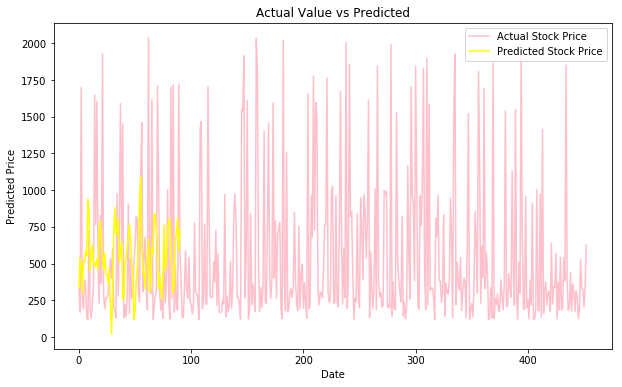

In [66]:
plt.figure(figsize=(10,6))
plt.plot(open_testing_processed, color='pink', label='Actual Stock Price')
plt.plot(predictions , color='yellow', label='Predicted Stock Price')
plt.title('Actual Value vs Predicted')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


This code creates a plot using matplotlib with a custom size of 10 inches by 6 inches. The plot displays two lines: one representing the actual stock price colored in pink, and the other representing the predicted stock price colored in yellow. The title of the plot is "Actual Value vs Predicted" and the x-axis is labeled as "Date" while the y-axis is labeled as "Predicted Price". A legend is also added to indicate which line represents the actual stock price and which line represents the predicted stock price. Lastly, the plot is displayed using plt.show().

**This wasn't a great result with one feature so let's try using more features and then train them on LSTM model**

**USING 5FEATURES :**


**USING THE BEST 5 FEATURES FROM THE RESULT OF THE XGBOOST. ITS QUITE OBVIOUS THAT A SINGLE FEATURE WILL NOT WORK SO WE USE THE 6 FEATURES THAT
COULD GENERATE THE BEST OUTCOME FROM XGBOOST**

In [0]:
dataset = dataset_ex_df[['Open', 'Close','High','Adj Close','Low']]

This code is assigning a list of columns from a data frame, dataset_ex_df, to a new variable called dataset. The columns being selected and assigned are 'Open', 'Close', 'High', 'Adj Close', and 'Low'. These columns represent different financial values for a particular asset or item. This code is essentially extracting these specific columns from dataset_ex_df and creating a new data frame. This new data frame, dataset, will only contain the columns that were selected.

In [68]:
dataset.head()

Open       Close        High   Adj Close         Low
0  136.250000  133.899994  136.610001  133.899994  133.139999
1  133.429993  134.690002  135.479996  134.690002  131.809998
2  134.600006  132.250000  134.729996  132.250000  131.649994
3  132.009995  130.000000  132.320007  130.000000  128.800003
4  130.559998  133.520004  133.679993  133.520004  129.029999

This code displays the first few rows of the dataset. It does so by calling the 'head()' function on the dataset, which is a common function used in data analysis and data science libraries. The 'head()' function allows us to see the first few rows of a dataset, typically five by default, but this can be changed by specifying a different number in the parentheses. This is useful for getting a quick overview of the data and understanding the structure and content of the dataset before diving into further analysis or data manipulation.

In [0]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

This code defines a function called "new_dataset" that takes two arguments, "dataset" and "step_size". It is used to convert a 1-dimensional dataset into a time series dataset. The first line of the function defines two empty lists, data_X and data_Y, which will store the input and output data for the time series.   The next line contains a for loop that iterates over the length of the given dataset minus the "step_size" and minus 1. This loop will run for each element in the dataset except for the last "step_size + 1" elements.   Inside the for loop, the current element of the dataset (from i to i+step_size) is extracted and stored in a variable "a". This represents the input data for the time series.   Next, this input data and the next element in the dataset after the "step_size" elements (representing the output data) are added to the respective lists, data_X and data_Y. This process repeats for each element in the dataset except for the last "step_size + 1" elements.   Finally, the function returns two arrays, "data_X" and "data_Y", which contain the input and output data for the time series. These arrays are converted to numpy arrays before being returned.

In [0]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM


This code first starts by importing important libraries that will be used later in the code. The libraries being imported are Pandas, Matplotlib, NumPy, Math, and Scikit-learn. Pandas is a library that is used for data analysis, Matplotlib is used for visualization, NumPy is used for scientific computing, Math is used for mathematical functions, and Scikit-learn is used for machine learning algorithms. Next, we import specific functions from the scikit-learn library, including MinMaxScaler which is used for normalizing data and mean_squared_error which is a metric used for evaluating regression models. Then, we import functions from the Keras library, including the Sequential model which is used for creating sequential deep learning models, and Dense and Activation which are used for implementing layers in a neural network. Finally, we import the LSTM layer from Keras, which stands for Long Short-Term Memory, and is a type of recurrent neural network that is commonly used for time-series data. Overall, this code sets up the necessary libraries and functions that will be used for building and evaluating a LSTM model.

In [0]:
# FOR REPRODUCIBILITY
np.random.seed(7)

This code sets the seed value for the random number generator to 7, which ensures that the same set of random numbers is generated each time the code is run. This is useful for reproducibility, as it allows other users to obtain the same results.

In [0]:
# IMPORTING DATASET 
dataset = dataset.reindex(index = dataset.index[::-1])

This code imports a dataset and orders it in reverse order. First, it imports the dataset using the "dataset" variable. Then, it uses the "reindex" function to rearrange the dataset's index in reverse order. The syntax "dataset.index[::-1]" is used to specify the order as reverse. This means that the last index value will become the first and the first value will become the last. Finally, the dataset is re-assigned to the original "dataset" variable, replacing the original dataset with the new, reordered one.

In [0]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

This code allows for the creation of a custom index for added flexibility. The first line uses the NumPy library's "arange" function to create a NumPy array called "obs". This will be used as our custom index. It takes in three arguments: start, stop, and step. The "start" argument is set to 1, which is the starting number of our custom index. The "stop" argument is set to "len(dataset) + 1", which is the length of the dataset plus 1. This ensures that the custom index will include all the items in the dataset. The "+ 1" is added because the "stop" argument is exclusive, and we want to include the last item in the dataset. The "step" argument is set to 1, which means that our custom index will increase by 1 for each item in the dataset. This ensures that our custom index will be in the same order as the dataset. Overall, this code allows for the creation of a custom index that can be used for flexible and efficient data manipulation.

In [0]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

This code takes different indicators for prediction by calculating the mean of each row in the given dataset, assigned as OHLC_avg. Next, it also calculates the mean of the High, Low, and Close columns in the dataset and assigns them as HLC_avg. Lastly, it takes the Close column values and assigns them as close_val. These indicators can be used for predicting future trends and patterns in the dataset, as they give an overall picture of the data and its changes over time.

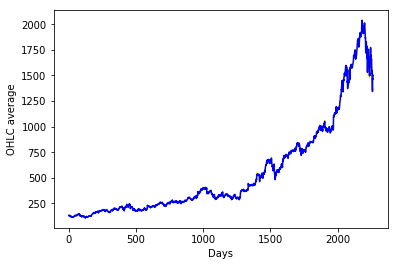

In [75]:
# PLOTTING All INDICATORS IN PLOT
plt.plot(OHLC_avg, 'yellow', label = 'OHLC avg')
plt.plot(close_val, 'blue', label = 'Closing price')
plt.xlabel('Days')
plt.ylabel('OHLC average')
plt.show()


This code is plotting two different indicators on the same plot. The first line sets the color of the first indicator (OHLC_avg) to yellow and labels it as 'OHLC avg'. The second line sets the color of the second indicator (close_val) to blue and labels it as 'Closing price'. The third line sets the x-axis label as 'Days' and the y-axis label as 'OHLC average'. The last line displays the plot with both indicators and their corresponding labels. This code is useful for visualizing the relationship between the OHLC average and the closing price over time.

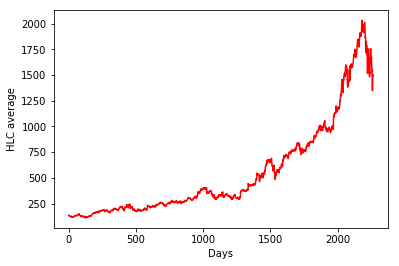

In [76]:
plt.plot(HLC_avg, 'red', label = 'HLC avg')
plt.xlabel('Days')
plt.ylabel('HLC average')
plt.show()


This code first imports the "matplotlib.pyplot" module and then uses the "plot" function to create a line graph. The data used for the graph is HLC_avg, which is represented by a red line. The label for this line is set to 'HLC avg'. The x-axis is labeled as 'Days' and the y-axis is labeled as 'HLC average'. Finally, the graph is displayed using the "show" function. This code is used to visualize the average of the highest, lowest, and closing values over a certain period of time.

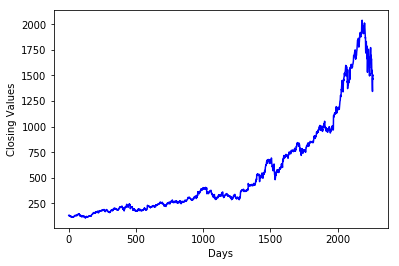

In [77]:
plt.plot(close_val, 'blue', label = 'Closing price')
plt.xlabel('Days')
plt.ylabel('Closing Values')
plt.show()

This code plots a line graph using the values given in the 'close_val' variable. The color of the line is set to "blue" and it is labeled as "Closing price". The x-axis is labeled as "Days" and the y-axis is labeled as "Closing Values". Finally, the plotted graph is displayed using the plt.show() function.

In [0]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) 
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

This code prepares a time series dataset, named OHLC_avg, by reshaping it into a numpy array and then scaling it using the MinMaxScaler function. The OHLC_avg dataset is first converted into a 2-dimensional array using the NumPy function reshape(). This ensures that the necessary transformations can be applied to the data easily. Next, the data is scaled using the MinMaxScaler with a feature range of 0 to 1. This ensures that all values in the dataset are within the same range and comparable. The scaler is fit to the data using the fit_transform() function, which calculates and applies the scaling transformation to the data. By preparing the dataset in this way, it is now ready to be used for further analysis or modeling.

In [0]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

This code is used to perform a train-test split on a dataset called OHLC_avg. The first line calculates the index for splitting the dataset into train and test sets, using the total length of the dataset and multiplying it by 0.75. This means that 75% of the data will be used for training and the remaining 25% for testing. The second line calculates the length of the test set by subtracting the train set length from the total dataset length. The third line assigns two variables, train_OHLC and test_OHLC, to the train and test sets respectively. The final line splits the dataset into train and test sets using the previously calculated index. The train set contains the data from index 0 to the train_OHLC index, while the test set contains the remaining data from the train_OHLC index to the end of the dataset. This train-test split is commonly used in machine learning to evaluate the performance of a model on unseen data.

In [0]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

This code is creating a time-series dataset for two different time intervals, train and test. It first takes the train_OHLC data and assigns it to the variable trainX, and then creates a new dataset by shifting the data by one time period. This new dataset is assigned to the variable trainY. This means that for each data point in trainX, there is a corresponding data point in trainY that is shifted by one time period. The same is done for the test data, where the test_OHLC data is assigned to testX and a new dataset is created by shifting the data by one time period, which is assigned to testY. This process creates two sets of data where the values for each time period in train are used to predict the values for the next time period. This type of dataset is often used in time-series analysis and forecasting.

In [0]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1


This code first uses the numpy reshape function to modify the training data (trainX) and testing data (testX) into a new array shape. This function creates a new array by taking in the existing arrays and rearranging the elements based on the given shape.   In this case, the new shape is created with three arguments - trainX, a tuple (consisting of the new shape with the first element being the original number of training data points, followed by 1, and then the number of features in trainX) and testX, a tuple (with the first element being the original number of testing data points, followed by 1, and then the number of features in testX).  The reshape function essentially creates a new array where the original data is reused and remapped to fit
the new shape. This process is repeated for both the training and testing data, creating new arrays that have the same data but are now organized differently.   Finally, the last line of code sets the step size to be equal to 1, which indicates that the newly reshaped data points will be used sequentially with no gaps. This step size is important in machine learning algorithms where continuous data is needed to make predictions.   In summary, this code takes in the original training and testing data, modifies their shape, and creates new arrays that can be used for machine learning algorithms. The step size is then set for the data to be read sequentially.

In [0]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

This code defines a sequential model for an LSTM (long short-term memory) neural network. The first line initializes the model and the subsequent lines add layers to the model. The first layer is an LSTM layer with 32 units, input_shape of (1, step_size), and return_sequences set to True, which means the output from this layer will be used as input for the next layer. The second layer is another LSTM layer with 16 units, and the third layer is a Dense layer with one unit. Finally, an activation function of 'linear' is added to the model, indicating that this is a regression model.

In [83]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad',metrics = ['mae']) # Try mae, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 17s - loss: 0.0069 - mean_absolute_error: 0.0469
Epoch 2/50
 - 16s - loss: 3.2351e-04 - mean_absolute_error: 0.0151
Epoch 3/50
 - 16s - loss: 2.5536e-04 - mean_absolute_error: 0.0134
Epoch 4/50
 - 16s - loss: 2.0761e-04 - mean_absolute_error: 0.0119
Epoch 5/50
 - 16s - loss: 1.7103e-04 - mean_absolute_error: 0.0106
Epoch 6/50
 - 16s - loss: 1.4206e-04 - mean_absolute_error: 0.0095
Epoch 7/50
 - 16s - loss: 1.2193e-04 - mean_absolute_error: 0.0086
Epoch 8/50
 - 16s - loss: 1.0676e-04 - mean_absolute_error: 0.0079
Epoch 9/50
 - 16s - loss: 9.4709e-05 - mean_absolute_error: 0.0073
Epoch 10/50
 - 16s - loss: 8.5842e-05 - mean_absolute_error: 0.0068
Epoch 11/50
 - 16s - loss: 7.8493e-05 - mean_absolute_error: 0.0063
Epoch 12/50
 - 16s - loss: 7.2784e-05 - mean_absolute_error: 0.0059
Epoch 13/50
 - 16s - loss: 6.9067e-05 - mean_absolute_error: 0.0057
Epoch 14/50
 - 16s - loss: 6.5934e-05 - mean_absolute_error: 0.0054
Epoch 15/50
 - 16s - loss: 6.3742e-05 - mean_absolute_error: 

This code compiles and trains a model for a machine learning problem. On the first line, the model is compiled with a mean squared error loss function and Adagrad optimizer, and using mean absolute error as the metric for evaluating the model's performance. On the second line, the model is trained with 50 epochs (or passes through the data), a batch size of 1 (meaning the entire dataset will be used per batch), and a verbose value of 2 (specifying that the training progress will be displayed while running). The comments suggest that different optimizers can be tried (mae, adam, adagrad) and compared to see which one works best for the specific problem.

In [87]:
mae = model.evaluate(testX, testY, batch_size=16)
print('Mean Absolute Error for Y:', mae)

565/565 [==============================] - 0s 250us/step
Mean Absolute Error for Y: [9.329830344243025e-06, 0.0026545574847378034]


This code first initializes a variable called "mae" and assigns it to the value of the "evaluate" method called on a model, passing in two arguments: "testX" and "testY". The "evaluate" method likely calculates and returns the performance metrics for the model on the given data, which in this case is the mean absolute error (MAE).   Once the "evaluate" method finishes, the mean absolute error value is assigned to the "mae" variable.   Lastly, the code prints out a string stating the mean absolute error for Y, followed by the value of the "mae" variable. This allows the user to see the performance of the model on the given data.

**The mean absolute error is lower than the past model with one feature. The errror is almost 0.0026. So the training model should be pretty close to testing model.**

In [0]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

This code uses a machine learning model, named "model", to make predictions on two different datasets: "trainX" and "testX". The first line of code uses the model to predict values for the dataset "trainX", and stores these predictions in a variable called "trainPredict". Similarly, the second line of code uses the model to predict values for the dataset "testX" and stores these predictions in a variable called "testPredict". Essentially, this code is using the model to make predictions on two different sets of data and storing those predictions for later analysis or use.

In [0]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

This code is used for de-normalizing data for plotting purposes. First, it takes the predicted values for the training data and uses the scaler's inverse_transform function to convert them back into their original scale. Similarly, the actual training data is also converted back to its original scale. Next, the predicted values for the test data are de-normalized, followed by the actual test data. This ensures that the data is represented in its original scale when plotting, rather than the normalized scale used for training the model.

In [90]:
# TRAINING rmse
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train : %.2f' % (trainScore))

Train : 14.47


This code is calculating the root mean squared error (RMSE) for a training dataset, which is a measure of the difference between the predicted values and the actual values.   First, the code imports the math library, which is necessary for the sqrt function.   Then, the code uses the mean_squared_error function from the Scikit-Learn library to calculate the mean squared error for the training dataset. This function takes two arguments: the actual values (trainY[0]) and the predicted values (trainPredict[:,0]). The actual values are set to the first element (index 0) of the trainY array, while the predicted values are all the values in the first column (index 0) of the trainPredict array.   Next, the code uses the sqrt function from the math library to calculate the square root of the mean squared error. This gives us the RMSE for the training dataset.   Finally, the code uses the print function to display the value of the RMSE for the training dataset. The string 'Train : %.2f' is used as the format specifier, which tells the print function to display the value of the variable trainScore with two decimal places. This allows us to see the RMSE in a more user-friendly format.

In [91]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 5.88


This code calculates the root mean squared error (RMSE) of a model's predictions on a test data set. First, the variable testScore is assigned to the output of the math.sqrt function, which takes the mean squared error value as its input. The mean squared error is calculated using the mean_squared_error function, which takes in the first element of the testY array and the values in the first column of the testPredict array as inputs. Then, the result is printed to the console with a label indicating that it is the test RMSE. The test RMSE is a measure of how close the predicted values are to the actual values in the test data set, with lower values indicating better performance of the model.

In [0]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

This code creates a dataset called trainPredictPlot that is used to plot the predictions made during training. The first line creates an empty dataset using a function called np.empty_like(), which creates a new array with the same shape, data type, and order as the input array. The second line sets all the values in the trainPredictPlot dataset to NaN (not a number). This is done to ensure that the plot only shows the predictions and not the other data points. The third line specifies the range of values to be plotted, which is from the step_size index to the length of the trainPredict dataset plus the step_size index. Finally, the last line copies the values from the trainPredict dataset to the trainPredictPlot dataset, starting from the step_size index and ending at the last value in the trainPredict dataset. This effectively shifts the trainPredict dataset to the right by the step_size index, aligning it with the predictions in the trainPredictPlot dataset. This code allows for easy visualization of the training predictions along with the actual data.

In [0]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

This code creates a dataset for plotting predictions made by a model on a test dataset. It first creates an empty array, testPredictPlot, with the same size and shape as the average of the open, high, low, and close prices (OHLC_avg) dataset. Then, it assigns all values in this array to be "not a number" (NaN). Next, it uses slicing to assign values from the start of the test predictions (len(trainPredict)+(step_size*2)+1) until the end of the OHLC_avg dataset to the testPredictPlot array. This creates a subset of the OHLC_avg dataset with NaN values in all positions except where the test predictions are present. This allows for easy visualization and comparison of the predictions with the actual values. Overall, this code creates a dataset that can be used for plotting the predictions made by a model on a test dataset.

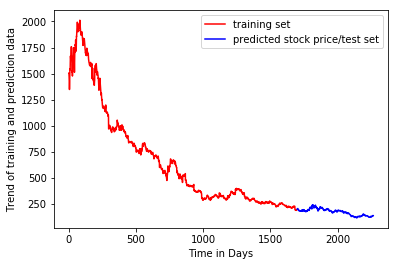

In [94]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('Trend of training and prediction data')
plt.show()


This code is used to plot the main open, high, low, and close (OHLC) values along with the predictions for both the training and test data sets. This is done using the 'plt.plot' function, which takes in the 'trainPredictPlot' and 'testPredictPlot' variables as arguments. These variables hold the predicted values for the training and test data sets, respectively. The colors 'r' and 'b' are used to represent the training and test data, respectively. The 'label' keyword is used to specify the labels for each line in the plot. The function 'plt.legend' is used to display a legend on the graph, which helps to identify the different data sets. The x-axis represents the time in days, and the y-axis represents the trend of the data. Finally, the 'plt.show()' function is used to display the plot. This allows the user to visualize the predicted trends for the training and test data sets and compare them to the actual OHLC values.

**We trained our data for the first 1700 or so days and then tested for the rest. The prediction plot has kept up with the pattern how ever not to my satisfaction.**

In [95]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)


Last Day Value: 139.6865234375
Next Day Value: 138.06378173828125


This code is designed to predict future values based on a given input. Firstly, it assigns the last value from a list called testPredict to a variable called last_val. It then divides this value by itself, essentially normalizing it, and assigns it to a variable called last_val_scaled. The next step is to use this scaled value as an input for a model to predict the next value. This is done using the model.predict function, which takes in a reshaped version of the scaled value. The predicted value is assigned to a variable called next_val, and the last_val is printed using the np.asscalar function, which converts a numpy array to a Python scalar. Similarly, the next_val is also printed, but this time it is multiplied by the last_val to get the actual predicted value. Finally, the code appends the last_val to the next_val in order to create a list of the last and predicted value.

**The value  was found  relying on OHLC values. As the days increase the value is decreasing or rather stabilizing. However this is a wrong way of going about since amazon prices are still booming not decreasing.**

**Next notebook I'll focus on NOT overfitting the model and trying to get more data. Also I'll perform hyperparameter tuning and then try to PREDICT the STOCK PRICE MOVEMENT instead of the prices** 

  Code Ref for LSTM:
  
  https://github.com/LiamConnell/deep-algotrading
  
  https://keras.io/getting-started/sequential-model-guide/

**IN THE NEXT NOTEBOOK I AM GOING TO FOCUS MORE ON NORMALIZATION WITH HYPERPARAMTER TUNING AND LESS ON FEATURE EXTRACTION. THE REASON FOR THIS IS IT LOOKS LIKE A LSTM ESPECIALLY ON KERAS DOESN'T DO A GREAT JOB AT PREDICTING DAY TO DAY VALUES.**

**CONCLUSION FOR THIS NOTEBOOK:**

**1. FEATURES**:

**Focused on feature engineering and made a total of 19 features. Most of them were based on momentum and moving avaerage and EMA. Even Bollinger Bands were calculated**

**2. ARIMA MODEL**

**Got a great ARIMA model with less differemce AIC and BIC and P values close to the coefficient**

**3. FOURIER TRANSFORM MODEL**

**We got great predictions with Fourier Transform very close to the actual values**

**4. FEATURE ENGINEERING WITH XGBOOST**

**Refer to feature extraction graph where features are highest by their closeness to their Closing values. As predicted EMA is pretty high in this feature.** 

**5. LSTM MODEL WITH ONE FEATURE** 

**LSTM model with one feature did NOT give us the predictions we wanted.**

**6. LSTM MODEL WITH MULTIPLE FEATURES**

**LSTM model with multiple features again did not give us predictions we wanted.**

**I have come to the conclusion that LSTMs are not great at predicting Stock Prices when you just input stock price directly but rather better at predicting stock price movement over a long period of time.With the help of these movements we can calclate the price.**

**For this reason  I will use a larger dataset in the next notebook that can be observed for longer time and then predict stock price movement**
 
